<img src="https://www.bbva.com/wp-content/uploads/2019/11/machine-learning-1024x629.jpg">

<h1>Machine Learning<span class="tocSkip"></span></h1>



# Import

## Libraries

In [1]:
import src.limpieza as lm
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Dataframe

In [3]:
data = pd.read_csv("data/Machine_learning/casas_train_or.csv")
data.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
id                        int64
title                    object
subtitle                 object
sq_mt_built             float64
sq_mt_useful            float64
n_rooms                   int64
n_bathrooms             float64
floor                   float64
neighborhood_id          object
rent_price                int64
buy_price                 int64
house_type_id            object
is_new_development         bool
is_renewal_needed          bool
energy_certificate       object
has_parking                bool
is_exterior                bool
is_orientation_north       bool
is_orientation_west        bool
is_orientation_south       bool
is_orientation_east        bool
tipo                    float64
barrio_pm2              float64
barrio                   object
distr                    object
e_certificate             int64
dtype: object

# Correlated columns

In [4]:
col = ['sq_mt_built','n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate',"is_orientation_west","is_orientation_south","rent_price", "buy_price"]
casas = data[col]

In [5]:
casas["is_new_development"] = casas["is_new_development"].astype(int)
casas["is_renewal_needed"] = casas["is_renewal_needed"].astype(int)
casas["has_parking"] = casas["has_parking"].astype(int)
casas["is_exterior"] = casas["is_exterior"].astype(int)
#casas["is_orientation_north"] = casas["is_orientation_north"].astype(int)
casas["is_orientation_west"] = casas["is_orientation_west"].astype(int)
casas["is_orientation_south"] = casas["is_orientation_south"].astype(int)
#casas["is_orientation_east"] = casas["is_orientation_east"].astype(int)

<ipython-input-5-59b86f582245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas["is_new_development"] = casas["is_new_development"].astype(int)
<ipython-input-5-59b86f582245>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas["is_renewal_needed"] = casas["is_renewal_needed"].astype(int)
<ipython-input-5-59b86f582245>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [6]:
casas.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,is_orientation_west,is_orientation_south,rent_price,buy_price
0,97.0,2,2.0,1.0,0,0,0,1,0.0,3.78378,2,0,1,1382,375000
1,220.0,4,3.0,4.0,0,0,1,1,1.0,4.27546,0,0,1,2517,975000
2,84.0,2,2.0,2.0,0,0,1,1,0.0,2.20531,0,0,0,1174,290000
3,77.0,3,1.0,1.0,0,1,0,1,0.0,1.82779,0,0,0,598,113500
4,59.0,3,1.0,1.0,0,1,0,1,0.0,2.23532,4,1,0,646,125000


<AxesSubplot:>

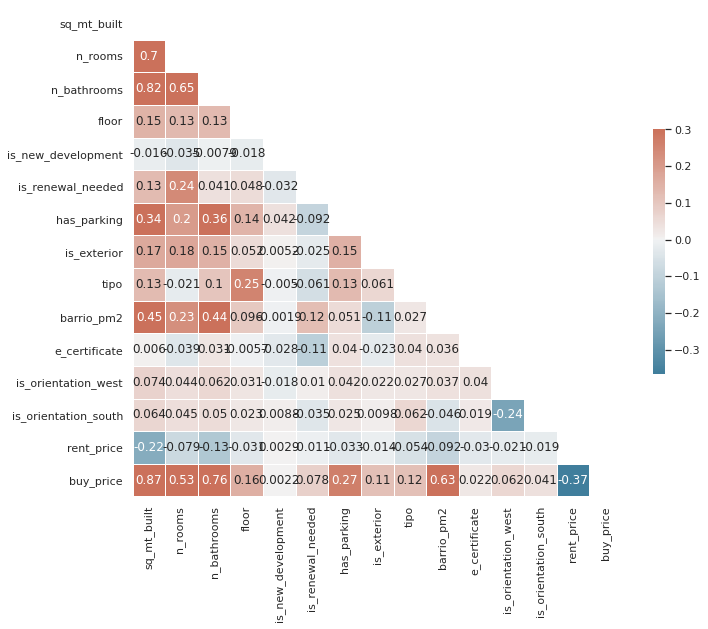

In [7]:
lm.heat_map_triangle(casas)

As I predicted in the cleaning jupyter, the columns useful square meters and built square meters are highly correlated so we must remove one of the two.

In [8]:
col2 = ['sq_mt_built','n_rooms', 'n_bathrooms', 'floor','has_parking', 'is_exterior', 'tipo','barrio_pm2', "is_orientation_west","is_orientation_south", "buy_price"]

<AxesSubplot:>

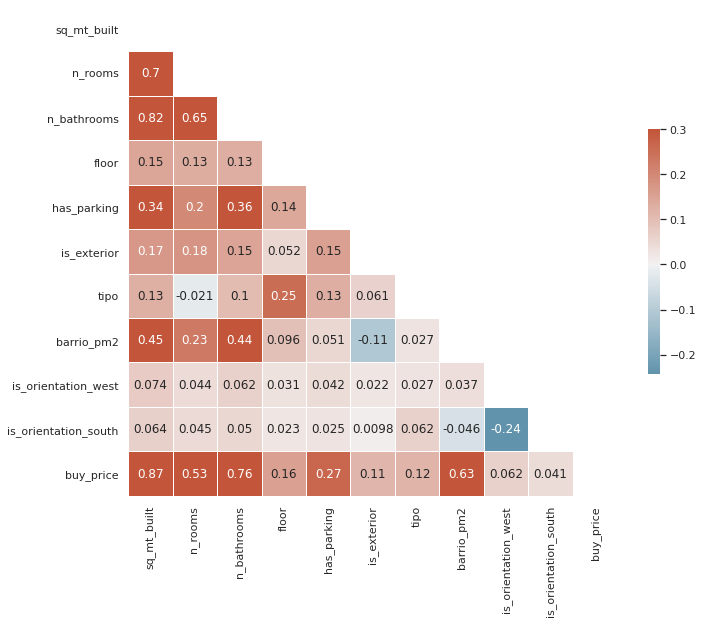

In [9]:
lm.heat_map_triangle(casas[col2])

In [10]:
casas[col2]

,sq_mt_built,n_rooms,n_bathrooms,floor,has_parking,is_exterior,tipo,barrio_pm2,is_orientation_west,is_orientation_south,buy_price
0,97.0,2,2.0,1.0,0,1,0.0,3.78378,0,1,375000
1,220.0,4,3.0,4.0,1,1,1.0,4.27546,0,1,975000
2,84.0,2,2.0,2.0,1,1,0.0,2.20531,0,0,290000
3,77.0,3,1.0,1.0,0,1,0.0,1.82779,0,0,113500
4,59.0,3,1.0,1.0,0,1,0.0,2.23532,1,0,125000
...,...,...,...,...,...,...,...,...,...,...,...
8672,87.0,3,1.0,3.0,0,1,0.0,4.02062,0,1,299000
8673,96.0,2,2.0,3.0,1,1,0.0,4.36790,1,0,459225
8674,117.0,3,2.0,3.0,1,1,0.0,3.60040,0,0,498000
8675,42.0,1,1.0,1.0,0,0,0.0,5.19625,0,1,299000


In [11]:
casas[col2]

,sq_mt_built,n_rooms,n_bathrooms,floor,has_parking,is_exterior,tipo,barrio_pm2,is_orientation_west,is_orientation_south,buy_price
0,97.0,2,2.0,1.0,0,1,0.0,3.78378,0,1,375000
1,220.0,4,3.0,4.0,1,1,1.0,4.27546,0,1,975000
2,84.0,2,2.0,2.0,1,1,0.0,2.20531,0,0,290000
3,77.0,3,1.0,1.0,0,1,0.0,1.82779,0,0,113500
4,59.0,3,1.0,1.0,0,1,0.0,2.23532,1,0,125000
...,...,...,...,...,...,...,...,...,...,...,...
8672,87.0,3,1.0,3.0,0,1,0.0,4.02062,0,1,299000
8673,96.0,2,2.0,3.0,1,1,0.0,4.36790,1,0,459225
8674,117.0,3,2.0,3.0,1,1,0.0,3.60040,0,0,498000
8675,42.0,1,1.0,1.0,0,0,0.0,5.19625,0,1,299000


# Best columns

In [16]:
col = ['sq_mt_built','n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate',"is_orientation_west","is_orientation_south","rent_price", "buy_price"]
casas = data[col]

In [17]:
results = smf.ols("buy_price ~ sq_mt_built + n_rooms + n_bathrooms + floor + is_new_development + is_renewal_needed + has_parking + is_exterior + tipo + barrio_pm2 + e_certificate + is_orientation_west + is_orientation_south + rent_price", data = casas[col]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     4170.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        09:10:06   Log-Likelihood:            -1.1927e+05
No. Observations:                8677   AIC:                         2.386e+05
Df Residuals:                    8662   BIC:                         2.387e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -5.586e+05   1.31e+04    -42.625      0.000   -5.84e+05   -5.33e+05
is_new_development[T.True]    1.174e+05   3.89e+04      3.019      0.003    4.12e+04    1.94e+05
is_renewal_needed[T.True]    -4.637e+04   6331.014     -7.325      0.000   -5.88e+04    -3.4e+04
has_parking[T.True]          -2.452e+04   5651.166     -4.338      0.000   -3.56e+04   -1.34e+04
is_exterior[T.True]           6.129e+04   9245.190      6.629      0.000    4.32e+04    7.94e+04
is_orientation_west[T.True]  -5795.8657   5287.898     -1.096      0.273   -1.62e+04    4569.673
is_orientation_south[T.True]  4811.2830   5046.994      0.953      0.340   -5082.025    1.47e+04
sq_mt_built                   4840.9526     56.302     85.982      0.000    4730.588    4951.317
n_rooms                      -4.361e+04   2949.921    -14.783      0.000   -4.94e+04   -3.78e+04
n_bathrooms                   6.119e+04   4337.130     14.108      0.000    5.27e+04    6.97e+04
floor                         7761.9232   1225.155      6.335      0.000    5360.327    1.02e+04
tipo                         -8106.6067   5084.267     -1.594      0.111   -1.81e+04    1859.765
barrio_pm2                    1.203e+05   1952.653     61.608      0.000    1.16e+05    1.24e+05
e_certificate                -1798.6555   1286.931     -1.398      0.162   -4321.346     724.035
rent_price                      -0.2323      0.005    -45.958      0.000      -0.242      -0.222
==============================================================================
Omnibus:                     3438.097   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95953.297
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                      19.081   Cond. No.                     7.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
col3 = ['sq_mt_built', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior','barrio_pm2', "is_orientation_north","is_orientation_west","is_orientation_south","is_orientation_east", 'buy_price']

# Train-Test-Split

In [18]:
X = casas.drop("buy_price", axis=1)
y = casas.buy_price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape

(6941, 14)

In [21]:
X_test.shape

(1736, 14)

In [22]:
y_train.shape

(6941,)

In [23]:

y_test.shape

(1736,)

# Train models

In [50]:
models = {"ridge":Ridge(),
         "lasso":Lasso(),
         "sgd":SGDRegressor(),
         "KNN":KNeighborsRegressor(),
         "gradient":GradientBoostingRegressor(),
          "Rfr" : RandomForestRegressor(),
          "Decision Tree" : DecisionTreeRegressor(max_depth=7),
          #"XGBoost" : XGBRegressor(),
          
         }

In [51]:

dicc= {}

for name, model in models.items():
    dicc_metrics = {}
    
    print(f"Trainning model -----> {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dicc_metrics["MAE"] = metrics.mean_absolute_error(y_test, y_pred)
    dicc_metrics["MSE"] = metrics.mean_squared_error(y_test,y_pred)
    dicc_metrics["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    dicc_metrics["R2_score"] = metrics.r2_score(y_true=y_test,y_pred=y_pred)
    
    dicc[name] = dicc_metrics
    
    print("Model finished")
metricas = pd.DataFrame(dicc)
metricas

Trainning model -----> ridge
Model finished
Trainning model -----> lasso
Model finished
Trainning model -----> sgd
Model finished
Trainning model -----> KNN
Model finished
Trainning model -----> gradient
Model finished
Trainning model -----> Rfr
Model finished
Trainning model -----> Decision Tree
Model finished


,ridge,lasso,sgd,KNN,gradient,Rfr,Decision Tree
MAE,1.379913e+05,1.379997e+05,2.634594e+19,1.725387e+04,3.115256e+04,9.458229e+03,2.109502e+04
MSE,6.996409e+10,6.996276e+10,4.202945e+41,8.517269e+09,4.594606e+09,4.185446e+09,5.612718e+09
RMSE,2.645073e+05,2.645048e+05,6.483013e+20,9.228905e+04,6.778352e+04,6.469502e+04,7.491808e+04
R2_score,8.262729e-01,8.262762e-01,-1.043629e+30,9.788509e-01,9.885912e-01,9.896072e-01,9.860631e-01


Best models to predict the diamond price are **###** and **###** 

# Max depth

In [ ]:
celda stop

In [32]:
results = []

for depth in range(1, 30):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train, model.predict(X_train)),
        "test_error": metrics.mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [33]:
results_df = pd.DataFrame(results)

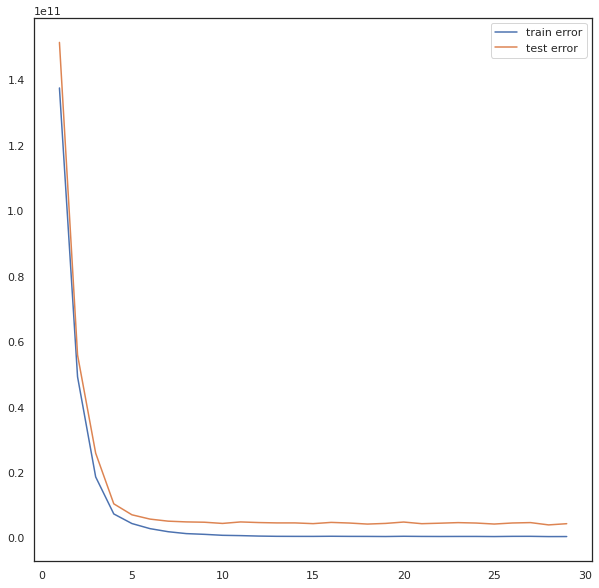

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

# Parameter Tuning
Now that we have found the most efficient model, let's try the different `hyperparameters` to improve it.

<img widht=300 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKDKAY6dn5D25dF8ixQ5FMYGvv34c_6Gxzfw&usqp=CAU">

In [35]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [6,7,8],
        "max_features": [.1,.25,.5,0.65,.75,0.8,.9,1],
        "min_samples_split": [2,3,5,10]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [36]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=5; total time=   0.2s
[CV 2/5] END m

[CV 2/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.6s
[CV 3/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.6s
[CV 4/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.6s
[CV 5/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.6s
[CV 1/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   0.7s
[CV 2/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   0.7s
[CV 3/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   0.6s
[CV 4/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   0.6s
[CV 5/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   0.6s
[CV 1/5] END max_depth=6, max_features=0.8, min_samples_split=3; total time=   0.6s
[CV 2/5] END max_depth=6, max_features=0.8, min_samples_split=3; total time=   0.6s
[CV 3/5] END max_depth=6, max_features=0.8, min_samples_split=3; tot

[CV 5/5] END max_depth=7, max_features=0.25, min_samples_split=5; total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.5, min_samples_split=3; 

[CV 2/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   0.8s
[CV 5/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   0.8s
[CV 1/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   0.8s
[CV 2/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   0.8s
[CV 5/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   0.7s
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2; total time=   0.2s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2; total time=   0.2s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2; total time= 

[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.7s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.7s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   0.7s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   0.7s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.75, min_samples_spl

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8],
                         'max_features': [0.1, 0.25, 0.5, 0.65, 0.75, 0.8, 0.9,
                                          1],
                         'min_samples_split': [2, 3, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [37]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]
grid_search_results["diferencia"] = grid_search_results["mean_test_score"] - grid_search_results["mean_train_score"]

In [38]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score,diferencia
88,8,0.9,2,-3.540829e+09,-1.326320e+09,-2.214509e+09
84,8,0.8,2,-3.646090e+09,-1.374590e+09,-2.271500e+09
89,8,0.9,3,-3.670591e+09,-1.424059e+09,-2.246532e+09
90,8,0.9,5,-3.726092e+09,-1.630056e+09,-2.096036e+09
85,8,0.8,3,-3.753043e+09,-1.474219e+09,-2.278824e+09
57,7,0.9,3,-3.759458e+09,-1.898120e+09,-1.861338e+09
91,8,0.9,10,-3.848443e+09,-1.966275e+09,-1.882168e+09
86,8,0.8,5,-3.911531e+09,-1.710852e+09,-2.200679e+09
81,8,0.75,3,-3.938322e+09,-1.578278e+09,-2.360044e+09
80,8,0.75,2,-3.959409e+09,-1.462746e+09,-2.496663e+09


In [39]:
best_tree = gs.best_estimator_

In [40]:
best_tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.9)

In [41]:
metrics.mean_squared_error(best_tree.predict(X_test),y_test)

4149299587.6000257

In [42]:
np.sqrt(metrics.mean_squared_error(best_tree.predict(X_test),y_test)).round(5)

64415.05715

In [43]:
prueba = pd.read_csv("data/Machine_learning/Test/casas_test_or.csv")

In [44]:
col = ['sq_mt_built','n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate',"is_orientation_west","is_orientation_south","rent_price", "buy_price"]
prueba = prueba[col]

In [45]:
prueba["predict"] = best_tree.predict(prueba.drop("buy_price", axis=1))
prueba.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,is_orientation_west,is_orientation_south,rent_price,buy_price,predict
0,100.0,2,1.0,4.0,False,False,False,True,2.0,2.57887,4,False,False,1146,279000,273873.700287
1,95.0,2,2.0,3.0,False,False,False,True,0.0,3.34109,0,True,False,1416,390000,392883.260120
2,53.0,1,1.0,2.0,False,True,False,True,0.0,4.69352,3,False,False,1197,299000,299571.035723
3,130.0,2,3.0,5.0,False,False,True,True,0.0,5.88764,0,False,True,2378,825000,861390.779424
4,159.0,4,3.0,1.0,False,False,True,True,0.0,4.24904,0,True,False,2417,850000,860702.500073


In [46]:
np.sqrt(metrics.mean_squared_error(best_tree.predict(prueba.drop(["buy_price","predict"], axis=1)),prueba["predict"])).round(2)

0.0

In [47]:
prueba["diferencia"] = round(np.sqrt((prueba["buy_price"] - prueba["predict"])**2),2)

In [54]:
prueba.sort_values("diferencia", ascending=True).sample(100)

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,is_orientation_west,is_orientation_south,rent_price,buy_price,predict,diferencia
21,130.0,4,2.0,9.0,False,False,True,True,0.0,2.45861,3,False,False,1405,385000,383854.544041,1145.46
845,81.0,3,1.0,0.0,False,True,False,True,0.0,5.00000,4,False,True,1275,330000,335459.447892,5459.45
662,100.0,2,1.0,3.0,False,False,False,True,0.0,4.25584,0,True,True,1405,385000,383354.096582,1645.90
942,91.0,3,1.0,7.0,False,True,False,True,0.0,4.25584,4,True,True,1485,420000,419379.899774,620.10
615,180.0,5,3.0,1.0,False,True,False,True,0.0,4.36790,0,True,False,1885,595000,591635.247027,3364.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,134.0,4,2.0,8.0,False,False,True,True,0.0,3.34109,0,False,True,1599,470400,473698.056269,3298.06
224,191.0,6,3.0,1.0,False,True,False,True,0.0,3.34109,0,False,True,1839,575000,583128.161124,8128.16
99,60.0,3,1.0,0.0,False,False,False,True,0.0,2.07658,0,False,True,658,128000,127563.226905,436.77
780,51.0,1,1.0,0.0,False,False,False,True,0.0,2.57887,0,False,False,740,149000,149291.086212,291.09


In [49]:
prueba.shape

(965, 17)